This notebook provides calculation of Pearcey integral $Pe(x,y)$ near the region of
$|Pe(x,y)|$ maximum and its derivatives in the same region.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.size'] = 16
rcParams['lines.linewidth'] = 2

import scipy.integrate as integrate

In [7]:
# This cell was taken from 
# https://gist.github.com/dpiponi/9176c7f6bf32803e9b2bf6e8c0b93ab5

# Dimension of grid over parameters
N = 2000
# Number of samples to use for integration
M = 100
# Magnitude of contour displacement.
# Determined by trial and error with a bunch of contour plots
# of the integrand.
rate = 0.01

# Tabulate Pe(α,β) = ∫(x = -∞,∞) exp(i(x⁴+αx²+β))dx
# In our notation in the article Pe(x,y)
Pe = np.zeros((N, N), dtype=np.float64)

xmin, xmax = (-3.0, 3.0)
ymin, ymax = (2.0, -5.0)
alphas = np.linspace(ymin, ymax, N)
betas = np.linspace(xmin, xmax, N)

# Integration range.
# The integrand drops to zero so fast this range
# is fine for now.
x = np.linspace(-4.0, 4.0, M)

for i, alpha in enumerate(alphas):
    for j, beta in enumerate(betas):
        # f(z) = z⁴+αz²+β
        # g(z) = exp(if(z))
        # Instead of integrating along x-axis we're
        # going to integrate along a contour displaced
        # vertically from the x-axis.
        # A good choice of displacement is the gradient
        # d/(Im f(x+iy))/dy.
        # That way, we're displacing in a direction that makes
        # |exp(if(x+iy))| smaller.
        y = rate*(4*x**3+2*alpha*x+beta)
        z = x+1j*y

        f = z**4+alpha*z**2+beta*z
        g = np.exp(1j*f)

        # ∫f(z)dz = ∫f(z)dz/dx dz
        dz = 1.0+1j*rate*(12*x**2+2*alpha)
        I = integrate.simps(g*dz, x)

        Pe[i, j] = np.abs(I)

print('Calculation finished')

Calculation finished


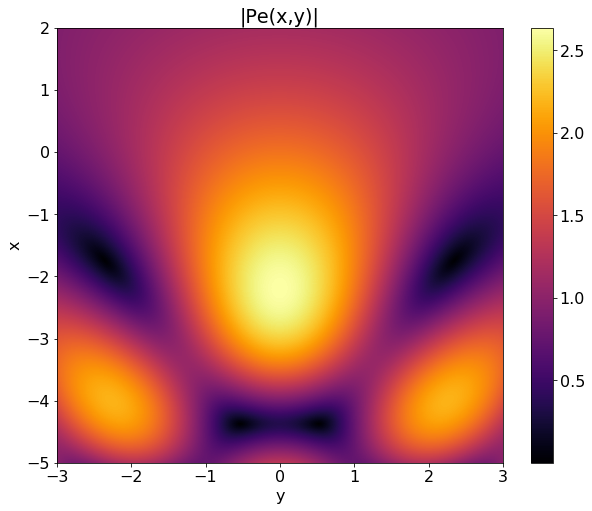

In [8]:
fig, ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(betas, alphas, Pe, cmap='inferno')
plt.title('|Pe(x,y)|')
plt.xlabel('y')
plt.ylabel('x')
plt.colorbar()
plt.show()

In [9]:
np.save('x_grid.npy', alphas)
np.save('y_grid.npy', betas)
np.save('Pe.npy', Pe)

### Calculation of derivatives

In [10]:
x_grid = np.load('x_grid.npy')
y_grid = np.load('y_grid.npy')
Pe = np.load('Pe.npy')

In [11]:
print(f'|Pe(x,y)| maximum: {Pe.max()}')
idx_x, idx_y = np.where(Pe == Pe.max())
idx_x, idx_y = idx_x[0], idx_y[1]
print(f'x_max: {x_grid[idx_x]}')
print(f'y_max: {y_grid[idx_y]}')

|Pe(x,y)| maximum: 2.6351064524470478
x_max: -2.1985992996498247
y_max: 0.0015007503751873763


In [12]:
# Find derivative of |Pe| with respect to (x,y)
dx = x_grid[1] - x_grid[0]
dy = y_grid[1] - y_grid[0]
d_Pe_dx = (Pe[2:] - Pe[:-2]) / (2*dx)
d_Pe_dy = (Pe[:,2:] - Pe[:,:-2]) / (2*dy)
d_Pe_dx2 = (Pe[2:] - 2*Pe[1:-1] + Pe[:-2]) / dx**2
d_Pe_dy2 = (Pe[:,2:] - 2*Pe[:,1:-1] + Pe[:,:-2]) / dy**2
d_Pe_dx_dy = np.zeros((N-2,N-2))
for i in range(1,N-2):
    for j in range(1,N-2):
        d_Pe_dx_dy[i,j] = Pe[i+1,j+1] - Pe[i+1,j-1] - Pe[i-1,j+1] + Pe[i-1,j-1]
        d_Pe_dx_dy[i,j] /= 4*dx*dy

d|Pe|/dx: 0.00265675895332957
d|Pe|/dy: -0.00786286223761469


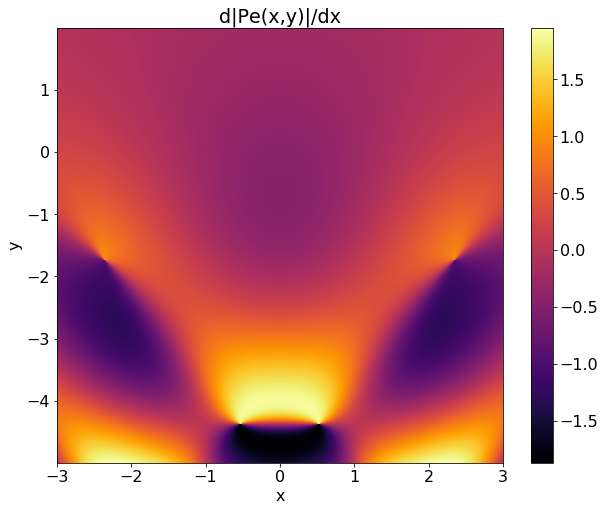

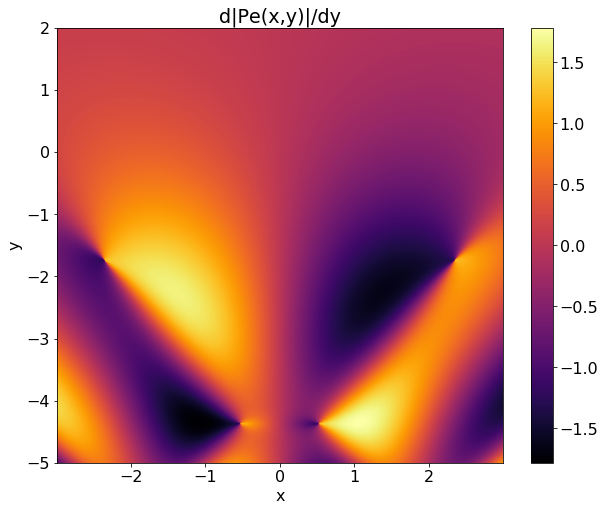

In [15]:
# Plot 1st derivatives, around max they should be close to 0
print(f'd|Pe|/dx: {d_Pe_dx[idx_x, idx_y]}')
print(f'd|Pe|/dy: {d_Pe_dy[idx_x, idx_y]}')

fig, ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(y_grid, x_grid[1:-1], d_Pe_dx, cmap='inferno')
plt.title('d|Pe(x,y)|/dx')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

fig, ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(y_grid[1:-1], x_grid, d_Pe_dy, cmap='inferno')
plt.title('d|Pe(x,y)|/dy')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

d2|Pe|/dx2: -0.7649296929074266
d2|Pe|/dy2 -1.7464175376063067
d2|Pe|/dx dy 0.0009886656275490278


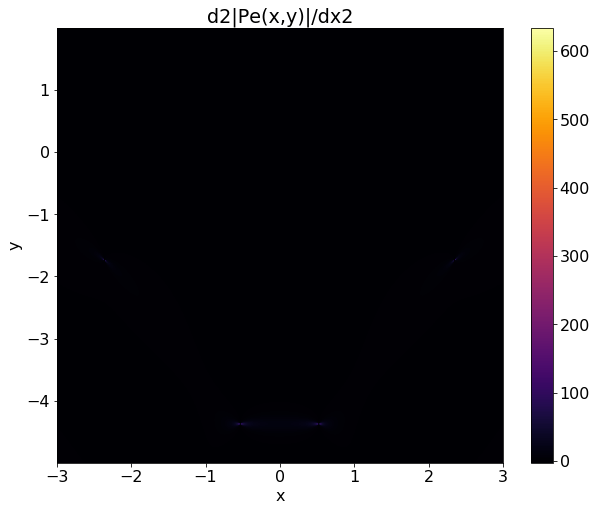

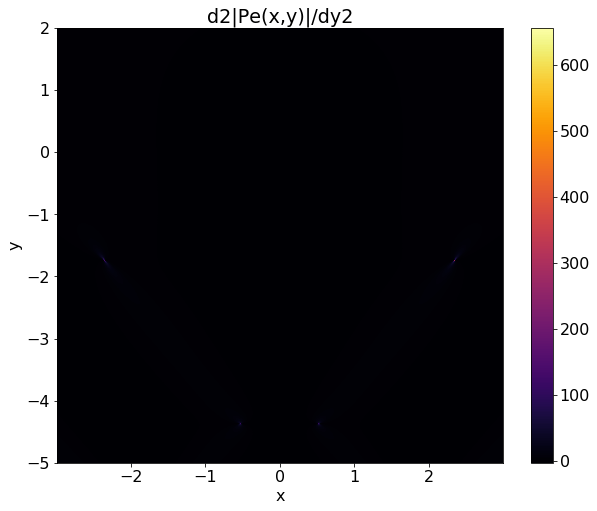

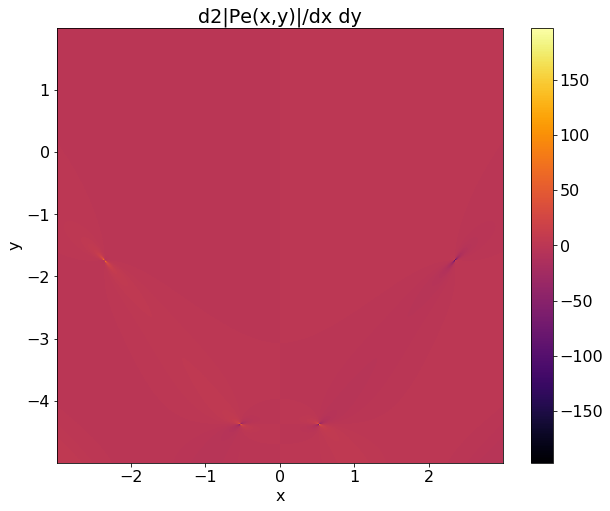

In [17]:
# Find 2nd derivatives at maximum location which later will be used in calculation
# of Taylor correciton to Pearcey maximum
print(f'd2|Pe|/dx2: {d_Pe_dx2[idx_x, idx_y]}')
print(f'd2|Pe|/dy2 {d_Pe_dy2[idx_x, idx_y]}')
print(f'd2|Pe|/dx dy {d_Pe_dx_dy[idx_x, idx_y]}')

fig, ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(y_grid, x_grid[1:-1], d_Pe_dx2, cmap='inferno')
plt.title('d2|Pe(x,y)|/dx2')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

fig, ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(y_grid[1:-1], x_grid, d_Pe_dy2, cmap='inferno')
plt.title('d2|Pe(x,y)|/dy2')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

fig, ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(y_grid[1:-1], x_grid[1:-1], d_Pe_dx_dy, cmap='inferno')
plt.title('d2|Pe(x,y)|/dx dy')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()